In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
words = open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
block_size = 3
X, Y = [], []
for w in words[:3]:
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '----->', itos[ix])
        context = context[1:] + [ix] #crop the last one and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... -----> e
..e -----> m
.em -----> m
emm -----> a
mma -----> .
olivia
... -----> o
..o -----> l
.ol -----> i
oli -----> v
liv -----> i
ivi -----> a
via -----> .
ava
... -----> a
..a -----> v
.av -----> a
ava -----> .


In [6]:
C = torch.randn((27, 2))

In [7]:
C[X]

tensor([[[ 0.2989, -1.2410],
         [ 0.2989, -1.2410],
         [ 0.2989, -1.2410]],

        [[ 0.2989, -1.2410],
         [ 0.2989, -1.2410],
         [-1.1907, -0.0646]],

        [[ 0.2989, -1.2410],
         [-1.1907, -0.0646],
         [ 0.6483, -0.4550]],

        [[-1.1907, -0.0646],
         [ 0.6483, -0.4550],
         [ 0.6483, -0.4550]],

        [[ 0.6483, -0.4550],
         [ 0.6483, -0.4550],
         [-1.0422, -0.7855]],

        [[ 0.2989, -1.2410],
         [ 0.2989, -1.2410],
         [ 0.2989, -1.2410]],

        [[ 0.2989, -1.2410],
         [ 0.2989, -1.2410],
         [-0.2528, -0.8239]],

        [[ 0.2989, -1.2410],
         [-0.2528, -0.8239],
         [-0.2224,  1.0154]],

        [[-0.2528, -0.8239],
         [-0.2224,  1.0154],
         [-0.3499, -0.5857]],

        [[-0.2224,  1.0154],
         [-0.3499, -0.5857],
         [ 0.2954, -0.5359]],

        [[-0.3499, -0.5857],
         [ 0.2954, -0.5359],
         [-0.3499, -0.5857]],

        [[ 0.2954, -0

In [8]:
C[X].shape

torch.Size([16, 3, 2])

In [9]:
emb = C[X]

In [10]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [12]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([16, 6])

In [17]:
h = torch.tanh(emb.view(-1,6) @ W1 + b1)

In [16]:
h.shape

torch.Size([16, 100])

In [18]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [19]:
logits = h @ W2 + b2

In [20]:
logits.shape

torch.Size([16, 27])

In [21]:
logits

tensor([[ -6.6745,  -7.4754,   5.6886,   2.5965,  -1.2465,  -6.5902,  -8.2576,
          12.4431,   2.9072,   5.5546,  -8.8877,  -6.7650,   1.0405,  -3.1388,
          14.1150,   3.0673,  -4.5765,   6.2176,  -6.1191,   6.0405,   0.5132,
          -5.8822, -23.4996,  -6.3595, -10.3019,  -6.8006,  -0.0592],
        [-10.2342,  -5.5114,  14.0960,  -1.1482,  -8.9194,  -7.4169, -12.3618,
           6.6457,   4.8402,  -5.7327,  -1.2169, -10.3200,   0.6088,  -5.3768,
          -3.5432,  10.3747,  -4.7056,   0.4381,  -6.3505,  -6.3350,  -1.2659,
         -10.9178,  -4.9719,   2.7948,  -9.6452,  -2.1447,   0.2916],
        [  1.9207,  -5.6206,  -0.8630,  -0.5479,  -3.4970, -16.7600,  -3.1978,
           6.0159,   3.0366,  -3.2691,  -6.2295,  -2.1267,   3.3850,   8.8305,
          -0.0874,  -8.0117,  -4.6370,   8.0025,  -8.0551,   6.7281,   3.9872,
           2.7688, -15.2153,  -6.9070,   2.4371,  -8.2294,  -0.1412],
        [ -1.3998,   6.1825,  -3.3062,   0.4939,  -2.0678,  -2.1343,   7.4536,


In [22]:
counts = logits.exp()
probs = counts / counts.sum(dim=1, keepdims=True)
probs

tensor([[7.8717e-10, 3.5336e-10, 1.8419e-04, 8.3633e-06, 1.7923e-07, 8.5634e-10,
         1.6163e-10, 1.5802e-01, 1.1412e-05, 1.6109e-04, 8.6073e-11, 7.1900e-10,
         1.7646e-06, 2.7015e-08, 8.4103e-01, 1.3392e-05, 6.4151e-09, 3.1262e-04,
         1.3717e-09, 2.6188e-04, 1.0415e-06, 1.7383e-09, 3.8816e-17, 1.0785e-09,
         2.0925e-11, 6.9386e-10, 5.8753e-07],
        [2.6476e-11, 2.9780e-09, 9.7571e-01, 2.3380e-07, 9.8592e-11, 4.4297e-10,
         3.1537e-12, 5.6710e-04, 9.3234e-05, 2.3867e-09, 2.1827e-07, 2.4297e-11,
         1.3548e-06, 3.4070e-09, 2.1315e-08, 2.3614e-02, 6.6663e-09, 1.1423e-06,
         1.2867e-09, 1.3068e-09, 2.0784e-07, 1.3364e-11, 5.1074e-09, 1.2058e-05,
         4.7710e-11, 8.6308e-08, 9.8660e-07],
        [6.0864e-04, 3.2301e-07, 3.7621e-05, 5.1551e-05, 2.7006e-06, 4.6927e-12,
         3.6426e-06, 3.6550e-02, 1.8578e-03, 3.3919e-06, 1.7570e-07, 1.0632e-05,
         2.6321e-03, 6.0987e-01, 8.1708e-05, 2.9564e-08, 8.6376e-07, 2.6646e-01,
         2.8309e-

In [24]:
#probabilities of the actual Y
probs[torch.arange(16), Y]

tensor([8.5634e-10, 3.4070e-09, 6.0987e-01, 8.3214e-03, 3.3377e-13, 1.3392e-05,
        3.1312e-06, 9.5065e-07, 3.7751e-06, 9.1179e-14, 2.0739e-06, 3.0734e-10,
        3.5336e-10, 5.0988e-13, 2.5240e-09, 2.9926e-09])

In [25]:
loss = -probs[torch.arange(16), Y].log().mean()
loss

tensor(17.4465)

Let's bring everything together before we train our network

### Training

In [26]:
X.shape, Y.shape

(torch.Size([16, 3]), torch.Size([16]))

In [30]:
g = torch.Generator().manual_seed(42)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [31]:
#total number of parameters
sum(p.nelement() for p in parameters)

3481

In [35]:
for p in parameters:
    p.requires_grad = True

In [37]:
for _ in range(1000):
    #forward pass
    emb = C[X] #(16, 3, 2) 16 letters, 3 at a time, 2 dimensional representation in the lookup table
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(16, 100)
    logits = h @ W2 + b2 #(16, 27)
    loss = F.cross_entropy(logits, Y)
    lr = 0.1

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    for p in parameters:
        p.data += -lr * p.grad

print(loss.item())

0.20686379075050354


We're only overfitting on 16 examples, so it's really easy to fit. We're overfitting a single batch of the data and getting a very low loss.

In [38]:
logits.max(1)

torch.return_types.max(
values=tensor([13.3011, 18.0624, 15.2196, 15.9607, 22.7150, 13.3011, 15.0914, 18.3051,
        12.8998, 18.3430, 11.0861, 24.3213, 13.3011, 17.6345, 14.8362, 21.2852],
       grad_fn=<MaxBackward0>),
indices=tensor([15, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0, 15, 22,  1,  0]))

In [40]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0])

### Dealing with the whole dataset

In [43]:
block_size = 3
X, Y = [], []
for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix] #crop the last one and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [75]:
g = torch.Generator().manual_seed(42)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

In [46]:
sum(p.nelement() for p in parameters)

3481

Running training on the whole data takes too much time for each epoch. We can deal with this by running minibatches.

In [48]:
for _ in range(10):
    #forward pass
    emb = C[X] #(16, 3, 2) 16 letters, 3 at a time, 2 dimensional representation in the lookup table
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(16, 100)
    logits = h @ W2 + b2 #(16, 27)
    loss = F.cross_entropy(logits, Y)
    lr = 0.1

    print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    for p in parameters:
        p.data += -lr * p.grad

2.9933059215545654


In [50]:
torch.randint(0,X.shape[0], (32,))

tensor([215521, 225120,  10452, 136335,  12928,  85072,  50581, 211363, 211293,
        219066, 195599, 159148,   1020, 206777,  69621, 164314, 198967, 174616,
        152845,  34354,  49033, 184662, 183205, 205627, 225093, 127030,  15605,
        211579, 141113,  23802,  68212, 208996])

In [56]:
for _ in range(100):
    #minibatch construction
    ix = torch.randint(0,X.shape[0], (16,))

    #forward pass
    emb = C[X[ix]] #(16, 3, 2) 16 letters, 3 at a time, 2 dimensional representation in the lookup table
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(16, 100)
    logits = h @ W2 + b2 #(16, 27)
    loss = F.cross_entropy(logits, Y[ix])
    lr = 0.1

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    for p in parameters:
        p.data += -lr * p.grad

print('Minibatch loss: ', loss.item())

Minibatch loss:  2.537816286087036


This works better because it's much better to have an approximate gradient and make many more steps rather than having the exact gradient and make fewer steps

In [57]:
emb = C[X] #(16, 3, 2) 16 letters, 3 at a time, 2 dimensional representation in the lookup table
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(16, 100)
logits = h @ W2 + b2 #(16, 27)
loss = F.cross_entropy(logits, Y)
print('Loss for whole dataset: ', loss.item())

Loss for whole dataset:  2.9347846508026123


Let's find a good initial learning rate

In [65]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [73]:
lri = []
lossi = []
for i in range(1000):
    #minibatch construction
    ix = torch.randint(0,X.shape[0], (16,))

    #forward pass
    emb = C[X[ix]] #(16, 3, 2) 16 letters, 3 at a time, 2 dimensional representation in the lookup table
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(16, 100)
    logits = h @ W2 + b2 #(16, 27)
    loss = F.cross_entropy(logits, Y[ix])

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
    lri.append(lre[i])
    lossi.append(loss.item())

print('Minibatch loss: ', loss.item())
emb = C[X] #(16, 3, 2) 16 letters, 3 at a time, 2 dimensional representation in the lookup table
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(16, 100)
logits = h @ W2 + b2 #(16, 27)
loss = F.cross_entropy(logits, Y)
print('Loss for whole dataset: ', loss.item())

Minibatch loss:  11.988909721374512
Loss for whole dataset:  10.304634094238281


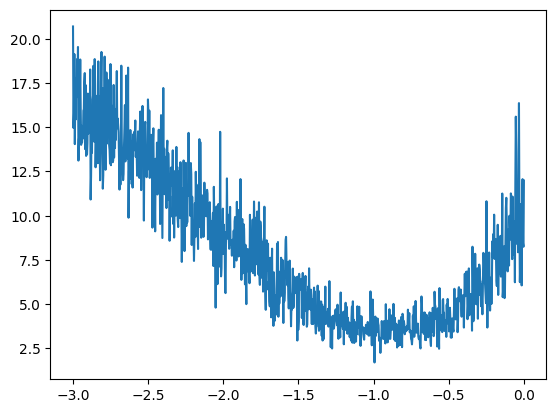

In [74]:
plt.plot(lri, lossi)

In [80]:
for i in range(10000):
    #minibatch construction
    ix = torch.randint(0,X.shape[0], (16,))

    #forward pass
    emb = C[X[ix]] #(16, 3, 2) 16 letters, 3 at a time, 2 dimensional representation in the lookup table
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(16, 100)
    logits = h @ W2 + b2 #(16, 27)
    loss = F.cross_entropy(logits, Y[ix])

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = 1e-1
    for p in parameters:
        p.data += -lr * p.grad

print('Minibatch loss: ', loss.item())
emb = C[X] #(16, 3, 2) 16 letters, 3 at a time, 2 dimensional representation in the lookup table
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(16, 100)
logits = h @ W2 + b2 #(16, 27)
loss = F.cross_entropy(logits, Y)
print('Loss for whole dataset: ', loss.item())

Minibatch loss:  1.756354570388794
Loss for whole dataset:  2.453437089920044


Learning rate decay to 1e-2

In [83]:
for i in range(10000):
    #minibatch construction
    ix = torch.randint(0,X.shape[0], (16,))

    #forward pass
    emb = C[X[ix]] #(16, 3, 2) 16 letters, 3 at a time, 2 dimensional representation in the lookup table
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(16, 100)
    logits = h @ W2 + b2 #(16, 27)
    loss = F.cross_entropy(logits, Y[ix])

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = 1e-2
    for p in parameters:
        p.data += -lr * p.grad

print('Minibatch loss: ', loss.item())
emb = C[X] #(16, 3, 2) 16 letters, 3 at a time, 2 dimensional representation in the lookup table
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(16, 100)
logits = h @ W2 + b2 #(16, 27)
loss = F.cross_entropy(logits, Y)
print('Loss for whole dataset: ', loss.item())

Minibatch loss:  2.4816784858703613
Loss for whole dataset:  2.2990212440490723


We have now dramatically improved on the bigram model's loss (2.45)

In [87]:
#training split, dev/validation split, test split
#80%, 10%, 10%
def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix] #crop the last one and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

X_train, y_train = build_dataset(words[:n1])
X_val, y_val = build_dataset(words[n1:n2])
X_test, y_test = build_dataset(words[n2:])

torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])


In [88]:
n2 - n1

3203

In [89]:
print(X_train.shape, y_train.shape)

torch.Size([182437, 3]) torch.Size([182437])


In [95]:
#initialise model weights
g = torch.Generator().manual_seed(42)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

In [97]:
for i in range(10000):
    #minibatch construction
    ix = torch.randint(0,X_train.shape[0], (16,))

    #forward pass
    emb = C[X_train[ix]] #(16, 3, 2) 16 letters, 3 at a time, 2 dimensional representation in the lookup table
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(16, 100)
    logits = h @ W2 + b2 #(16, 27)
    loss = F.cross_entropy(logits, y_train[ix])

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = 1e-2
    for p in parameters:
        p.data += -lr * p.grad

print('Minibatch loss: ', loss.item())
emb = C[X_val] #(16, 3, 2) 16 letters, 3 at a time, 2 dimensional representation in the lookup table
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(16, 100)
logits = h @ W2 + b2 #(16, 27)
loss = F.cross_entropy(logits, y_val)
print('Loss for whole dataset: ', loss.item())

Minibatch loss:  2.8561301231384277
Loss for whole dataset:  2.337839126586914


Our training loss and validation loss are around the same, which means our network is underfitting. We can squeeze out some performance by increasing the size of the network.

In [101]:
#initialise model weights
g = torch.Generator().manual_seed(42)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6,300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

In [100]:
sum(p.nelement() for p in parameters)

10281

In [102]:
lossi = []
stepi = []
for i in range(50000):
    #minibatch construction
    ix = torch.randint(0,X_train.shape[0], (16,))

    #forward pass
    emb = C[X_train[ix]] #(16, 3, 2) 16 letters, 3 at a time, 2 dimensional representation in the lookup table
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(16, 100)
    logits = h @ W2 + b2 #(16, 27)
    loss = F.cross_entropy(logits, y_train[ix])

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = 1e-1
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
    stepi.append(i)
    lossi.append(loss.item())

print('Minibatch loss on training set: ', loss.item())
emb = C[X_val] #(16, 3, 2) 16 letters, 3 at a time, 2 dimensional representation in the lookup table
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(16, 100)
logits = h @ W2 + b2 #(16, 27)
loss = F.cross_entropy(logits, y_val)
print('Loss for validation set: ', loss.item())

Minibatch loss on training set:  2.732295274734497
Loss for validation set:  2.6035709381103516


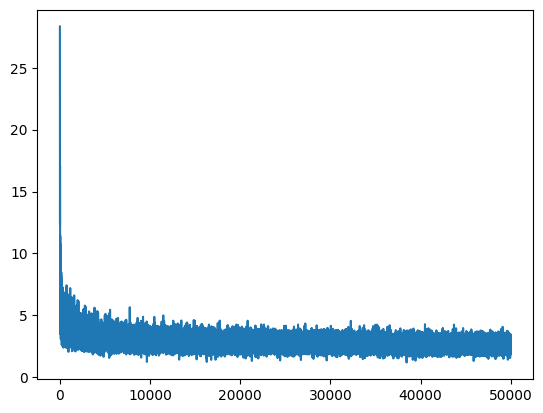

In [103]:
plt.plot(stepi, lossi)

We're still not fitted well. Since we made the net bigger, it would take longer to fit. One possibility is that the batch size is so low that it's causing the noise we see above. Let's train a bit more and see how it goes.

In [104]:
lossi = []
stepi = []
for i in range(50000):
    #minibatch construction
    ix = torch.randint(0,X_train.shape[0], (16,))

    #forward pass
    emb = C[X_train[ix]] #(16, 3, 2) 16 letters, 3 at a time, 2 dimensional representation in the lookup table
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(16, 100)
    logits = h @ W2 + b2 #(16, 27)
    loss = F.cross_entropy(logits, y_train[ix])

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = 1e-1
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
    stepi.append(i)
    lossi.append(loss.item())

print('Minibatch loss on training set: ', loss.item())
emb = C[X_val] #(16, 3, 2) 16 letters, 3 at a time, 2 dimensional representation in the lookup table
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(16, 100)
logits = h @ W2 + b2 #(16, 27)
loss = F.cross_entropy(logits, y_val)
print('Loss for validation set: ', loss.item())

Minibatch loss on training set:  2.3997573852539062
Loss for validation set:  2.485365152359009


Another bottleneck could be that we're cramming too much into the 2-D embeddings

### Visualizing the embeddings

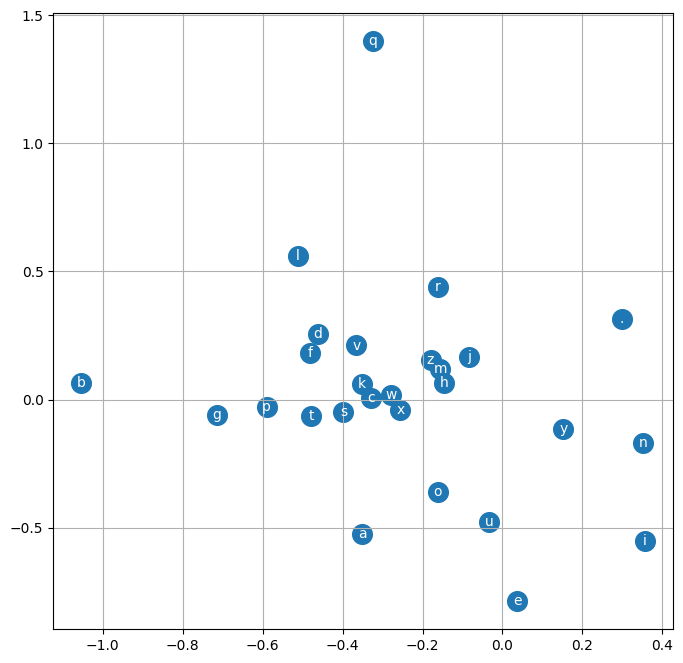

In [105]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data,C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha='center',va='center',color='white')
plt.grid('minor')

The vowels are around the same zone - this tells us the neural net has learned that they are used in similar places. The dot is far from everything, so is q. Let's scale up the embedding size.

In [110]:
#initialise model weights
g = torch.Generator().manual_seed(42)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30,200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

In [107]:
sum(p.nelement() for p in parameters)

11897

In [111]:
lossi = []
stepi = []

In [116]:
for i in range(50000):
    #minibatch construction
    ix = torch.randint(0,X_train.shape[0], (16,))

    #forward pass
    emb = C[X_train[ix]] #(16, 3, 10) 16 letters, 3 at a time, 10 dimensional representation in the lookup table
    h = torch.tanh(emb.view(-1,30) @ W1 + b1) #(16, 100)
    logits = h @ W2 + b2 #(16, 27)
    loss = F.cross_entropy(logits, y_train[ix])

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = 1e-2
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
    stepi.append(i)
    lossi.append(loss.log10().item())

print('Minibatch loss on training set: ', loss.item())
emb = C[X_val] 
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2 #(16, 27)
loss = F.cross_entropy(logits, y_val)
print('Loss for validation set: ', loss.item())

Minibatch loss on training set:  2.463402032852173
Loss for validation set:  2.2353875637054443


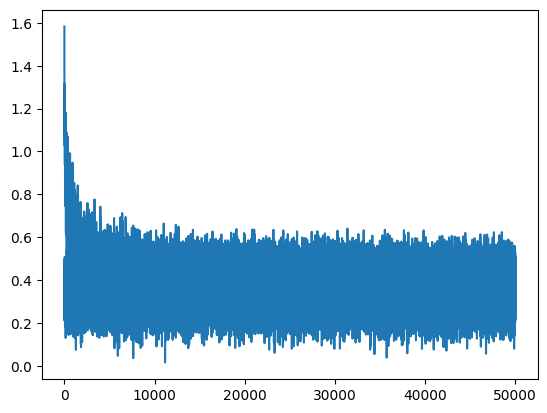

In [117]:
plt.plot(stepi,lossi)

### Sample from the model

In [118]:
g = torch.Generator().manual_seed(42)
for _ in range(10):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])] #(1,block_size,d)
        h = torch.tanh(emb.view(1,-1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim = 1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

anukeen.
tis.
aari.
nedyn.
shan.
silayley.
kemah.
luvan.
epeccellen.
dazi.
